In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_all = pd.read_pickle('destin_1')

In [4]:
def getnum(s):
    return int(filter(lambda x: x.isdigit(),s))

In [238]:
df_all.loc[df_all.review_num == 'missing', 'review_num'] = '0'
mr = pd.read_pickle('meanrating.pkl')
df_all['rn'] = df_all.review_num.apply(getnum)
df_r = df_all.loc[:,['rn']]
df_r = df_r.join(pd.DataFrame(mr)).fillna(0)

In [248]:
rall = df_r.rn.sum()
rave = df_r.rating.mean()

def BayesianRate(x):
    m=600
    return x['rn']/(m+x['rn'])*x['rating'] + m/(m+x['rn'])*rave

In [249]:
brate = df_r.apply(BayesianRate,1).sort_values(ascending=False)

In [250]:
brate.head()

attraction
National Gallery                    46.258150
British Museum                      46.237785
V&A - Victoria and Albert Museum    46.213632
Churchill War Rooms                 45.986002
Tower of London                     45.943936
dtype: float64

In [185]:
catlist = df_all.category.apply(lambda x: x.split(','))

In [187]:
cat=[]
for l in catlist:
    cat = cat + l
cat = map(lambda s: 'cat_' + s.lstrip().lower(), cat)

In [189]:
b = pd.DataFrame(0,index=df_all.index,columns=np.unique(cat))

In [190]:
c = pd.concat([catlist,b],1)

In [193]:
c.head()

,category,cat_airport lounges,cat_ancient ruins,cat_antique stores,cat_architectural buildings,cat_arenas & stadiums,cat_art galleries,cat_art museums,cat_ballets,cat_biking trails,...,cat_theaters,cat_theme parks,cat_tramways,cat_transportation,cat_traveler resources,cat_universities & schools,cat_visitor centers,cat_water & amusement parks,cat_wineries & vineyards,cat_zoos & aquariums
attraction,,,,,,,,,,,,,,,,,,,,,
National Gallery,"[ Art Museums, Museums]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
British Museum,"[ Art Museums, History Museums, Museums]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V&A - Victoria and Albert Museum,"[ Art Museums, Museums]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Churchill War Rooms,"[ Historic Sites, History Museums, Military ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
St. James's Park,[ Nature & Parks],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
def onehot(s):
    for x in s['category']:
        cname = 'cat_' + x.lstrip().lower()
        s[cname] = 1
    return s

In [215]:
feature_cat = c.apply(onehot,1).drop('category',1)

In [228]:
topcat = pd.Series(cat).value_counts().index[:5]

In [229]:
topcat

Index([u'cat_sights & landmarks', u'cat_museums',
       u'cat_points of interest & landmarks', u'cat_shopping',
       u'cat_nature & parks'],
      dtype='object')

In [263]:
f = f.join(pd.DataFrame(brate,columns=['rating']))

In [273]:
f

,cat_airport lounges,cat_ancient ruins,cat_antique stores,cat_architectural buildings,cat_arenas & stadiums,cat_art galleries,cat_art museums,cat_ballets,cat_biking trails,cat_bodies of water,...,cat_theme parks,cat_tramways,cat_transportation,cat_traveler resources,cat_universities & schools,cat_visitor centers,cat_water & amusement parks,cat_wineries & vineyards,cat_zoos & aquariums,rating
attraction,,,,,,,,,,,,,,,,,,,,,
National Gallery,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,46.258150
British Museum,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,46.237785
V&A - Victoria and Albert Museum,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,46.213632
Churchill War Rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.986002
St. James's Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.708059
Houses of Parliament,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.871251
Hyde Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.052869
Borough Market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.191892
Tower of London,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.943936


In [275]:
from sklearn.manifold import TSNE

In [276]:
ts = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [594]:
%%time
tsf = ts.fit_transform(ff)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1718 samples in 0.007s...
[t-SNE] Computed neighbors for 1718 samples in 0.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1718
[t-SNE] Computed conditional probabilities for sample 1718 / 1718
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.797646
[t-SNE] Error after 500 iterations: 0.360230
Wall time: 20.9 s


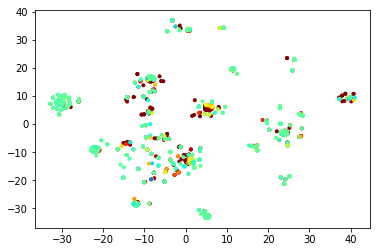

In [322]:
plt.scatter(tsf[:,0],tsf[:,1],marker='.',c=f.rating.values, cmap='jet',vmax=24)

In [323]:
import bokeh.plotting as bp
from bokeh.models import HoverTool
from bokeh.models import LinearColorMapper
from bokeh.plotting import figure, show, output_notebook

In [334]:
df_ts = pd.DataFrame(tsf, columns=['x', 'y'])

In [360]:
df_ts['attraction']=df_all.index

In [338]:
df_ts['category'] = df_all.category

In [350]:
df_ts['rating'] = f.rating

In [344]:
from bokeh.models import LinearColorMapper

In [378]:
color_mapper = LinearColorMapper(palette='RdYlBu6', low=24, high=30)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'rating', 'transform': color_mapper},source=df_ts)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Name':'@attraction'}
show(plot_ts)

Loading BokehJS ...

In [395]:
df = df_ts.loc[:,['rating','attraction']]
df = df.join(df_all.duration.apply(lambda x: x.replace('Suggested Duration: ',''))) 
import seaborn as sns
sns.boxplot(x='duration',y='rating',data=df.loc[:,['duration', 'rating']])

In [407]:
from sklearn.preprocessing import LabelEncoder

In [408]:
le = LabelEncoder()

In [426]:
df_ts['duration'] = le.fit_transform(df.duration)

In [436]:
df_ts['dur'] = df.duration

In [439]:
color_mapper = LinearColorMapper(palette=['#D476C1','#4684C6','#70E87A','#F78526','#C4C4C4'], low=0, high=4)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'duration', 'transform': color_mapper},source=df_ts)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Duration':'@dur'}
show(plot_ts)

Loading BokehJS ...

In [479]:
lang = df_all.languages.apply(lambda x: x.replace('Chinese (Sim.)','ChineseSim'))
lang = lang.apply(lambda x: x.replace('Chinese (Trad.)','ChineseTrad'))

In [480]:
b = lang.apply(lambda x: x.split('; '))

In [481]:
ll = []
for l in b:
    lll = map(lambda x: x.split(' ')[0],l)
    ll = ll + lll

In [482]:
np.unique(ll)

array(['Arabic', 'ChineseSim', 'ChineseTrad', 'Czech', 'Danish', 'Dutch',
       'English', 'Finnish', 'French', 'German', 'Greek', 'Hebrew',
       'Hungarian', 'Indonesian', 'Italian', 'Japanese', 'Korean',
       'Norwegian', 'Polish', 'Portuguese', 'Russian', 'Serbian',
       'Slovak', 'Spanish', 'Swedish', 'Thai', 'Turkish', 'Vietnamese',
       'missing'], dtype='|S11')

In [493]:
df_lan = pd.DataFrame(0,index=df_all.index,columns=np.unique(ll)).drop('missing',1)

In [494]:
df_lan

,Arabic,ChineseSim,ChineseTrad,Czech,Danish,Dutch,English,Finnish,French,German,...,Polish,Portuguese,Russian,Serbian,Slovak,Spanish,Swedish,Thai,Turkish,Vietnamese
attraction,,,,,,,,,,,,,,,,,,,,,
National Gallery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
British Museum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V&A - Victoria and Albert Museum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Churchill War Rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
St. James's Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Houses of Parliament,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hyde Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Borough Market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tower of London,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [512]:
df_lan['language'] = b
df_lan['rn'] = df_all.rn

In [520]:
a = df_lan.iloc[0]

In [561]:
def langnum(s):
    for x in s['language']:
        lname = x.split(' ')[0]
        try:
            s[lname] = float(getnum(x.split(' ')[1]))/s['rn']
        except:
            return s
    return s

In [576]:
df_lan = df_lan.apply(langnum,1)

In [578]:
a = df_lan.drop(['language','rn'],axis=1)

In [581]:
f1 = pd.concat([ff,a],axis=1)

In [582]:
ts = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [593]:
%%time
tsf1 = ts.fit_transform(f1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1718 samples in 0.025s...
[t-SNE] Computed neighbors for 1718 samples in 0.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1718
[t-SNE] Computed conditional probabilities for sample 1718 / 1718
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.390324
[t-SNE] Error after 500 iterations: 0.370493
Wall time: 22.5 s


In [587]:
df_ts1 = df_ts.copy()

In [601]:
df_ts1.update(pd.DataFrame(tsf1,index=df_all.index,columns=['x','y']))

In [603]:
color_mapper = LinearColorMapper(palette='RdYlBu6', low=24, high=30)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'rating', 'transform': color_mapper},source=df_ts1)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Name':'@attraction'}
show(plot_ts)

Loading BokehJS ...

In [604]:
color_mapper = LinearColorMapper(palette=['#D476C1','#4684C6','#70E87A','#F78526','#C4C4C4'], low=0, high=4)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'duration', 'transform': color_mapper},source=df_ts1)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Duration':'@dur'}
show(plot_ts)

Loading BokehJS ...

In [446]:
df_all.hours.apply(lambda x: x[:x.find('Hours')])

attraction
National Gallery                                       Closed Now Fri10:00 AM - 9:00 PMSat - Thu10:00...
British Museum                                         Closed Now Fri10:00 AM - 8:30 PMSat - Thu10:00...
V&A - Victoria and Albert Museum                       Closed Now Fri10:00 AM - 10:00 PMSat - Thu10:0...
Churchill War Rooms                                                Closed Now Sun - Sat9:30 AM - 6:00 PM
St. James's Park                                                  Closed Now Sun - Sat5:00 AM - 12:00 AM
Houses of Parliament                                                                              missin
Hyde Park                                                         Closed Now Sun - Sat5:00 AM - 12:00 AM
Borough Market                                         Closed Now Mon - Thu10:00 AM - 5:00 PMFri10:00...
Tower of London                                        Closed Now Sun - Mon10:00 AM - 4:30 PMTue - Sa...
Tower Bridge                                

In [445]:
a[:a.find('Hours')]

'Closed Now Fri10:00 AM - 9:00 PMSat - Thu10:00 AM - 6:00 PM'

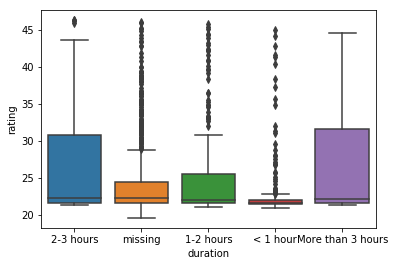

In [405]:
sns.boxplot(x='duration',y='rating',data=df.loc[:,['duration', 'rating']])

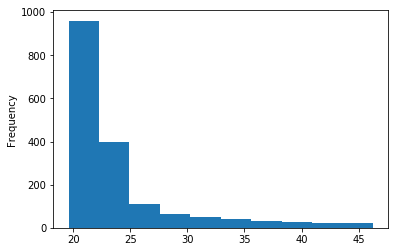

In [308]:
f.rating.plot(kind='hist')

In [290]:
tsf.shape

(1718L, 2L)

In [267]:
f.groupby('cat_museums')['rating'].mean()[1]

24.781698081470072

In [271]:
f.groupby('cat_points of interest & landmarks')['rating'].mean()[1]

24.2191775982432

In [272]:
f.rating.mean()

24.12620721265073

In [157]:
for x in c.iloc[1]['category']:
    d = 'cat_' + x.lstrip().lower()
    c[d] = 1

In [24]:
rate_counts = d.ra.value_counts()

In [26]:
rate_counts=rate_counts/sum(rate_counts)

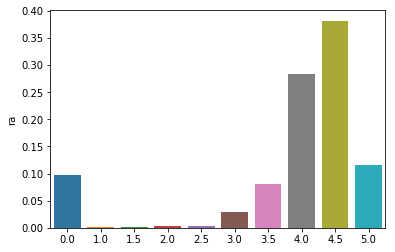

In [29]:
sns.barplot(rate_counts.index,rate_counts)